In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard


2023-11-01 15:22:53.850090: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 15:22:53.850144: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 15:22:53.850198: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 15:22:53.860207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_data_split = open('data_split.csv', 'rb')
data = pickle.load(file_data_split)
x_data,y_data = data
file_data_split.close()

x_train = np.concatenate((x_data[0], x_data[2],x_data[3]),axis=0)
y_train = np.concatenate((y_data[0], y_data[2],y_data[3]),axis=0)
x_test = x_data[1]
y_test = y_data[1]


encoder = LabelBinarizer()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [3]:
def show_history():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)
    plt.legend()

    plt.show()

In [4]:

input_shape = x_test[1].shape

model = Sequential()

model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))

model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))

model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('best_model_2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 256)         0

2023-11-01 15:22:55.760102: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 15:22:55.766204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 15:22:55.766485: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/10


2023-11-01 15:22:58.669475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-01 15:22:59.782315: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d12c205700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-01 15:22:59.782341: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-01 15:22:59.787131: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-01 15:22:59.863766: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


162/162 [==============================] - ETA: 0s - loss: 0.1091 - accuracy: 0.7991
Epoch 1: val_accuracy improved from -inf to 0.82407, saving model to best_model_2.h5
162/162 [==============================] - 8s 22ms/step - loss: 0.1091 - accuracy: 0.7991 - val_loss: 0.0976 - val_accuracy: 0.8241
Epoch 2/10
  9/162 [>.............................] - ETA: 2s - loss: 0.0816 - accuracy: 0.8472

/home/duyphuoc/Desktop/heart_sound_new/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/162 [============================>.] - ETA: 0s - loss: 0.0898 - accuracy: 0.8336
Epoch 2: val_accuracy did not improve from 0.82407
162/162 [==============================] - 3s 16ms/step - loss: 0.0897 - accuracy: 0.8335 - val_loss: 0.2127 - val_accuracy: 0.4916
Epoch 3/10
161/162 [============================>.] - ETA: 0s - loss: 0.0852 - accuracy: 0.8437
Epoch 3: val_accuracy did not improve from 0.82407
162/162 [==============================] - 3s 16ms/step - loss: 0.0851 - accuracy: 0.8439 - val_loss: 0.1477 - val_accuracy: 0.7690
Epoch 4/10
161/162 [============================>.] - ETA: 0s - loss: 0.0820 - accuracy: 0.8487
Epoch 4: val_accuracy did not improve from 0.82407
162/162 [==============================] - 3s 16ms/step - loss: 0.0821 - accuracy: 0.8485 - val_loss: 0.0941 - val_accuracy: 0.8216
Epoch 5/10
161/162 [============================>.] - ETA: 0s - loss: 0.0797 - accuracy: 0.8491
Epoch 5: val_accuracy did not improve from 0.82407
162/162 [==================

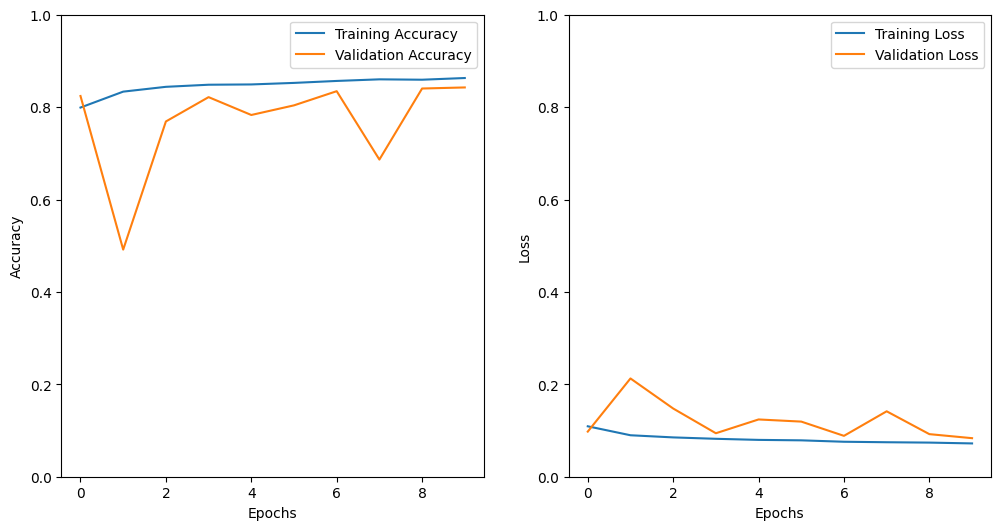

In [5]:
history = model.fit(x_train,y_train,batch_size=128, epochs=10,validation_data=(x_test, y_test), callbacks=[model_checkpoint])
show_history()